In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:

mnist_data = np.load('mnist.npz') # import local npz 
X_train, y_train, X_test, y_test  = mnist_data['x_train'], mnist_data['y_train'], mnist_data['x_test'], mnist_data['y_test']
# normalize x
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.
# we reserve the last 10000 training examples for validation
X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]


```python
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
```

In [3]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


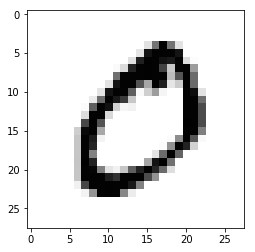

In [4]:
%matplotlib inline
plt.imshow(X_train[1], cmap="Greys");

In [5]:
# feature number hight/width
n_feature1 = X_test.shape[1]
n_feature2 = X_test.shape[2]
n_feature = n_feature1 * n_feature2
m = X_train.shape[0]

In [6]:
tf.reset_default_graph()

In [7]:
# placeholder for data
X_input = tf.placeholder(dtype= tf.float32, shape=(None,n_feature1, n_feature2), name = 'X_input')
y_target = tf.placeholder(dtype=tf.int64, shape=(None,), name= 'y_target')

In [8]:
X_flatten = tf.reshape(X_input, shape=(-1, n_feature), name='X_input_reshape')

In [9]:
with tf.name_scope(name='layer_1') as scope:
    w1 = tf.Variable(tf.random_normal([n_feature, 512], stddev=0.01),  name= 'w1')
    b1 =  tf.Variable(tf.zeros([1,512]), name='b1')
    out1 = tf.nn.relu(tf.matmul(X_flatten, w1) + b1, name='out1')
with tf.name_scope(name='layer_2') as scope:
    w2 = tf.Variable(tf.random_normal([512, 128], stddev=0.01), name='w2')
    b2 =  tf.Variable(tf.zeros([1,128]), name='b2')
    out2 = tf.nn.relu(tf.matmul(out1, w2) + b2, name='out2')
with tf.name_scope(name='output_layer') as scope:
    w3 = tf.Variable(tf.random_normal([128, 10], stddev=0.01), name ='w3')
    b3 =  tf.Variable(tf.zeros([1,10]), name='b3')
    logits = tf.nn.relu(tf.matmul(out1, w2) + b2, name='logits')
    y_predict = tf.nn.softmax(logits=logits)
    
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits= logits, labels= y_target))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)    

correct_prediction = tf.equal(tf.argmax(y_predict,1), y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
initializer = tf.global_variables_initializer()

In [10]:
epochs = 20
batch_size = 5000

In [11]:
loss_record = {'loss_train':[], 'loss_test':[]}

In [12]:
with tf.Session() as sess:
    sess.run(initializer)
    for epoch in range(epochs):
        for i in range(m // batch_size ):
            n_left = i * batch_size
            n_right = (i + 1)*batch_size
            X = X_train[n_left:n_right, :]
            y = y_train[n_left:n_right]
            loss_train, _, accuracy_train = sess.run([loss, optimizer, accuracy], feed_dict= {X_input:X, y_target:y})
            loss_test,accuracy_test =  sess.run([loss, accuracy], feed_dict= {X_input:X_test, y_target:y_test})
            loss_record['loss_train'].append(loss_train)
            loss_record['loss_test'].append(loss_test)
            if i % 2 == 0:
                print('epoch: ', epoch, '; batch: ', i)
                print('loss_train: ', loss_train, ';accuracy_train: ', accuracy_train, ';loss_test: ', loss_test, ';accuracy_test: ', accuracy_test)
                

epoch:  0 ; batch:  0
loss_train:  4.84802 ;accuracy_train:  0.0252 ;loss_test:  4.74979 ;accuracy_test:  0.3402
epoch:  0 ; batch:  2
loss_train:  4.53898 ;accuracy_train:  0.3478 ;loss_test:  4.01803 ;accuracy_test:  0.3393
epoch:  0 ; batch:  4
loss_train:  3.08539 ;accuracy_train:  0.3204 ;loss_test:  2.70313 ;accuracy_test:  0.3165
epoch:  0 ; batch:  6
loss_train:  2.71271 ;accuracy_train:  0.3734 ;loss_test:  3.14167 ;accuracy_test:  0.1225
epoch:  0 ; batch:  8
loss_train:  3.162 ;accuracy_train:  0.3584 ;loss_test:  2.87859 ;accuracy_test:  0.4141
epoch:  1 ; batch:  0
loss_train:  2.47677 ;accuracy_train:  0.4806 ;loss_test:  2.28017 ;accuracy_test:  0.4494
epoch:  1 ; batch:  2
loss_train:  2.20951 ;accuracy_train:  0.4544 ;loss_test:  2.16702 ;accuracy_test:  0.4712
epoch:  1 ; batch:  4
loss_train:  2.05337 ;accuracy_train:  0.445 ;loss_test:  2.0202 ;accuracy_test:  0.497
epoch:  1 ; batch:  6
loss_train:  1.89322 ;accuracy_train:  0.5786 ;loss_test:  1.68657 ;accuracy_te

epoch:  14 ; batch:  4
loss_train:  0.28186 ;accuracy_train:  0.9214 ;loss_test:  0.268653 ;accuracy_test:  0.9235
epoch:  14 ; batch:  6
loss_train:  0.297146 ;accuracy_train:  0.9126 ;loss_test:  0.270903 ;accuracy_test:  0.9234
epoch:  14 ; batch:  8
loss_train:  0.285349 ;accuracy_train:  0.9176 ;loss_test:  0.274251 ;accuracy_test:  0.9224
epoch:  15 ; batch:  0
loss_train:  0.251832 ;accuracy_train:  0.9324 ;loss_test:  0.263266 ;accuracy_test:  0.9257
epoch:  15 ; batch:  2
loss_train:  0.298783 ;accuracy_train:  0.9128 ;loss_test:  0.269514 ;accuracy_test:  0.9225
epoch:  15 ; batch:  4
loss_train:  0.275283 ;accuracy_train:  0.9242 ;loss_test:  0.262326 ;accuracy_test:  0.9249
epoch:  15 ; batch:  6
loss_train:  0.28869 ;accuracy_train:  0.9152 ;loss_test:  0.264245 ;accuracy_test:  0.926
epoch:  15 ; batch:  8
loss_train:  0.278132 ;accuracy_train:  0.9186 ;loss_test:  0.267943 ;accuracy_test:  0.9242
epoch:  16 ; batch:  0
loss_train:  0.244927 ;accuracy_train:  0.9344 ;loss

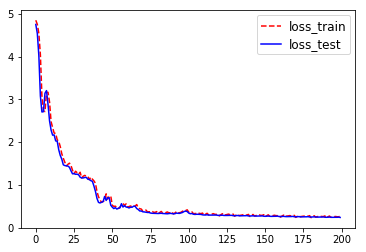

In [13]:
fig, ax = plt.subplots()
ax.plot(loss_record['loss_train'], '--r', label='loss_train')
ax.plot(loss_record['loss_test'], 'b', label='loss_test')

# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=False)

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()